In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# sns.set(color_codes=True)
# sns.set(style="ticks")

mw = {"SO2": 64.066, "CO2": 44.01}

In [3]:
df = pd.read_csv("../data/henry_constants.csv")
for gas in ["SO2", "CO2"]:
    df["H_" + gas + " [g/(g-bar)]"] = df[gas + "_henry coefficient [mmol/(g-bar)]"] * mw[gas] / 1000
df

,crystal,CO2_henry coefficient [mmol/(g-bar)],Temperature [K],SO2_henry coefficient [mmol/(g-bar)],Temperature [K].1,H_SO2 [g/(g-bar)],H_CO2 [g/(g-bar)]
0,MFM601,1.370301,298,97.240663,298,6.229820,0.060307
1,Zn-bdc-ted,2.158665,298,19.169554,298,1.228117,0.095003
2,Ni-bdc-ted,2.206897,298,40.402008,298,2.588395,0.097126
3,NOTT-202a,3.275732,293,153.600000,293,9.840538,0.144165
4,MFM600,1.418831,298,34.797254,298,2.229321,0.062443
5,NOTT-300,7.965262,293,483.863591,293,30.999205,0.350551
6,MFM-300-In,4.607513,298,171.432416,298,10.982989,0.202777
7,Zn-CN6,5.170580,298,4.364834,298,0.279637,0.227557
8,Mg-MOF-74,198.820320,298,150.412680,298,9.636339,8.750082
9,Co-CN6,2.440927,298,11.692121,298,0.749067,0.107425


In [8]:
formatted_crystal_names = {}
formatted_crystal_names["MFM601"] = "MFM-601"
formatted_crystal_names["Zn-bdc-ted"] = "Zn(bdc)(ted)$_{0.5}$"
formatted_crystal_names["Ni-bdc-ted"] = "Ni(bdc)(ted)$_{0.5}$"
formatted_crystal_names["NOTT-202a"] = "NOTT-202a"
formatted_crystal_names["MFM600"] = "MFM-600"
formatted_crystal_names["NOTT-300"] = "NOTT-300"
formatted_crystal_names["MFM-300-In"] = "MFM-300-In"
formatted_crystal_names["Zn-CN6"] = "Zn[Co(CN)$_6$]$_2$ nH$_2$O"
formatted_crystal_names["Mg-MOF-74"] = "Mg-MOF-74"
formatted_crystal_names["Co-CN6"] = "Co[Co(CN)$_6$]$_2$ nH$_2$O"

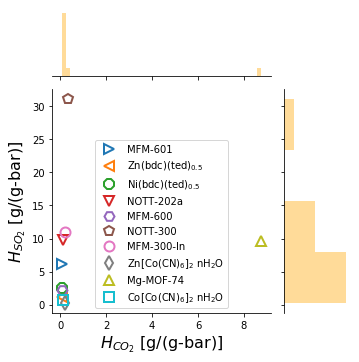

In [10]:
g = sns.jointplot("H_CO2 [g/(g-bar)]", "H_SO2 [g/(g-bar)]", data=df,
              height=5, ratio=3, color="orange")
g.set_axis_labels("$H_{CO_2}$ [g/(g-bar)]", "$H_{SO_2}$ [g/(g-bar)]", fontsize=16)

g.ax_joint.cla() # or g.ax_joint.collections[0].set_visible(False), as per mwaskom's comment

# set the current axis to be the joint plot's axis
plt.sca(g.ax_joint)
plt.xlabel("$H_{CO_2}$ [g/(g-bar)]")
plt.ylabel("$H_{SO_2}$ [g/(g-bar)]")

markers = [">", "<", "8", "v", "H", "p", "o", "d", "^", "s", "D", "*"]
for i in range(df.shape[0]):
    blah = plt.plot(df["H_CO2 [g/(g-bar)]"].iloc[i], df["H_SO2 [g/(g-bar)]"].iloc[i], 
                    marker=markers[i], ms=10, 
                    label=formatted_crystal_names[df["crystal"].iloc[i]],
                    linestyle="none", markevery=1,
                    markerfacecolor="none",
                    markeredgewidth=2.0,
                    clip_on=False, zorder=100)
plt.legend()
plt.savefig("henry_coeff_scatter_plot_marginal_distn.pdf", format="pdf")